## Stochastic Average Gradient Algorithm

- to deal with the big 'N' problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [94]:
# dataset

tau_vals = [0.1, 0.3, 0.5, 0.9, 0.99]
tau_lst = tau_vals
alpha_lst = np.round([tau if tau<= 0.5 else 1-tau for tau in tau_lst], 4)
np.ones(5) * 0.5

array([0.5, 0.5, 0.5, 0.5, 0.5])

In [45]:
def update_q(q, x, y, tau, N, alpha = 1):
    pinball_loss = tau if x > q else (tau-1)
    q += ((N-1)*y + pinball_loss)*alpha/N
    y = pinball_loss
    return q, y

In [109]:
def update_q_lst(q_lst, tau_lst, y_lst, x, N, changing_alpha = True):
#     print (y_lst)
    alpha_lst = np.round([tau if tau<= 0.5 else 1-tau for tau in tau_lst], 4)
    if not changing_alpha: alpha_lst = np.ones(len(tau_lst)) * 0.5
    for i, q in enumerate(q_lst):
        tau = tau_lst[i]
        y = y_lst[i]
#         alpha = tau if tau<= 0.5 else 1-tau
        alpha = alpha_lst[i]
        q, y = update_q(q, x, y, tau, N, (1/(alpha)))
        q_lst[i] = q
        y_lst[i] = round(y, 5)
    return q_lst, y_lst

update_q_lst(np.array([-3, -0.4, 0.6, 5, 89]), tau_vals, [ 0.1 ,  0.3 , -0.5 , -0.1 , -0.01], 0.37, 30000)

(array([-2. ,  0.6, -0.4,  4. , 88. ]), [0.1, 0.3, -0.5, -0.1, -0.01])

In [110]:
def get_results(dt, tau_lst, changing_alpha = True):
    N = dt.shape[0]
    q_procs = np.zeros((N, len(tau_lst)))
    q_lst = np.zeros(len(tau_lst))
    y_lst = np.zeros(len(tau_lst))
    for i, x in enumerate(dt):
        q_lst, y_lst = update_q_lst(q_lst, tau_lst, y_lst, x, N, changing_alpha)
        q_procs[i]= q_lst
    return q_procs

In [111]:
def update_q_lst_sgd(q_lst, tau_lst, x, alpha = 1):
    for i, q in enumerate(q_lst):
        tau = tau_lst[i]
        q += alpha * (tau) if x > q else (tau-1)
        q_lst[i] = q
    return q_lst

def get_results_sgd(dt, tau_lst=tau_vals):
    N = dt.shape[0]
    q_procs = np.zeros((N, len(tau_lst)))
    q_lst = np.zeros(len(tau_lst))
    for i, x in enumerate(dt):
        q_lst = update_q_lst_sgd(q_lst, tau_lst, x)
        q_procs[i] = q_lst
    return q_procs

In [125]:
dt = np.random.uniform(-400, 400, 50000)
# dt2 = np.random.uniform(-400, 400, 500000)


proc = get_results(dt, tau_vals)
proc2 = get_results(dt, tau_vals, False)
proc_sgd = get_results_sgd(dt, tau_lst=tau_vals)

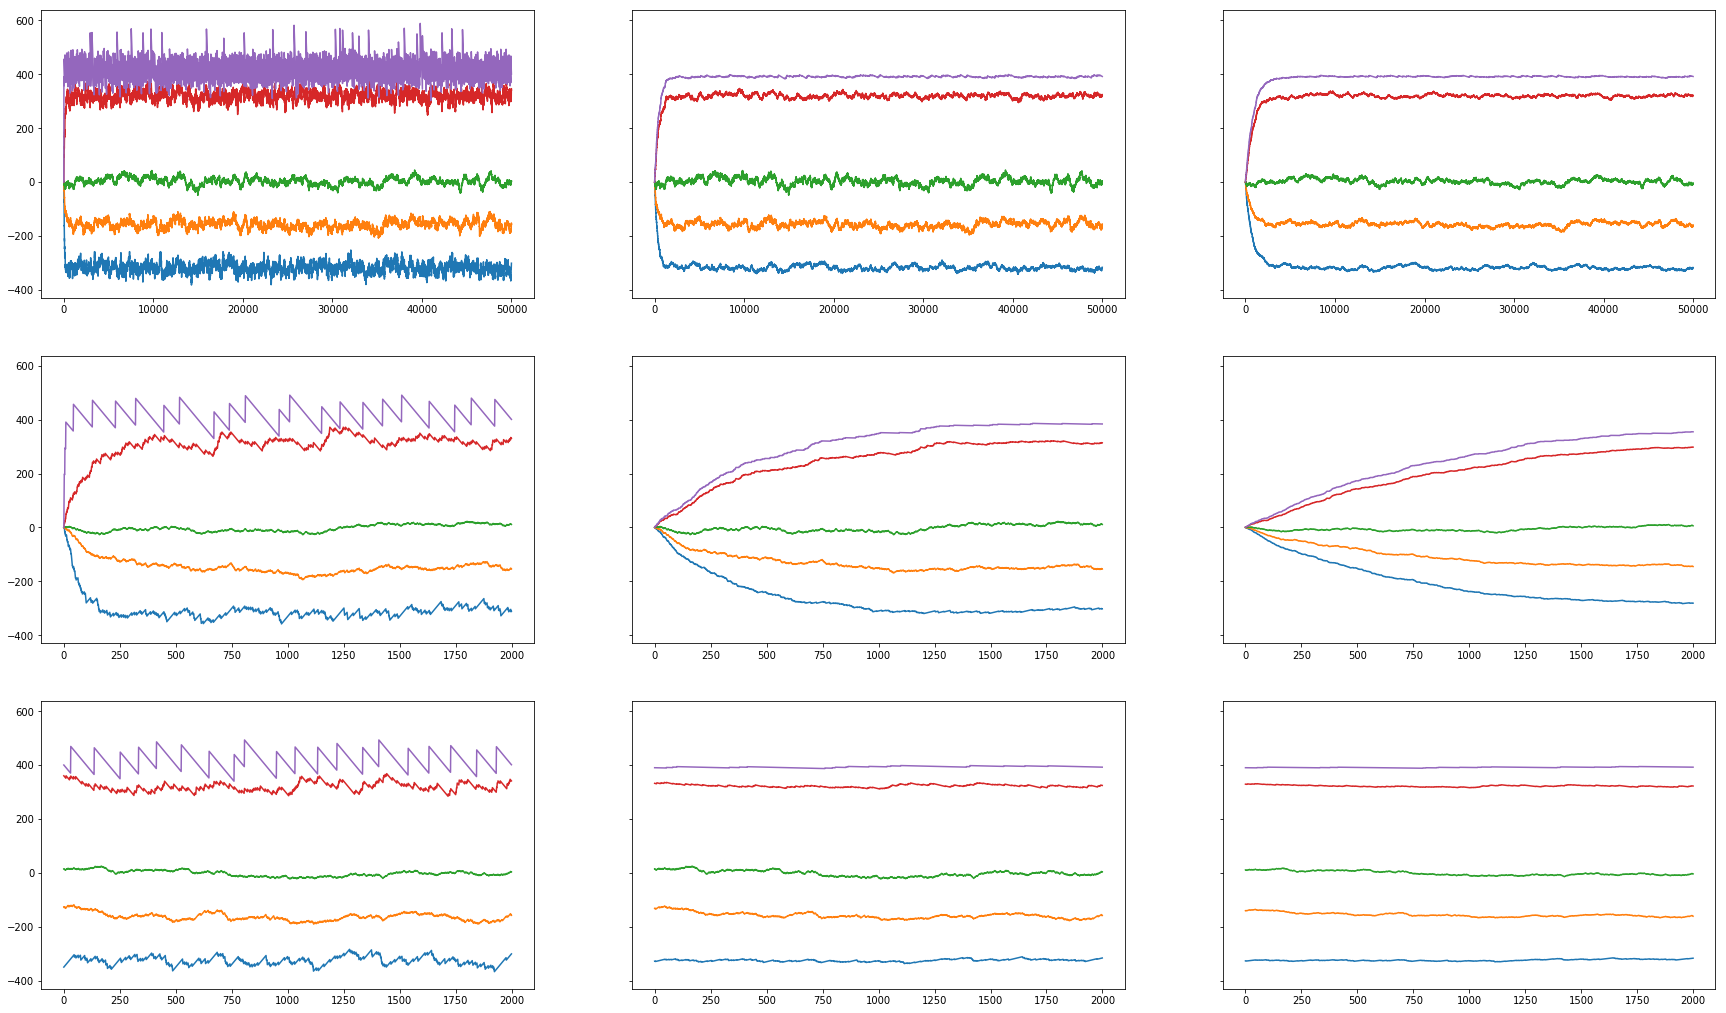

In [126]:
fig, axes = plt.subplots(3, 3, sharey=True)
fig.set_size_inches(30, 18)



axes[0][0].plot(proc)
axes[0][1].plot(proc2)
axes[0][2].plot(proc_sgd)
axes[1][0].plot(proc[:2000])
axes[1][1].plot(proc2[:2000])
axes[1][2].plot(proc_sgd[:2000])
axes[2][0].plot(proc[-2000:])
axes[2][1].plot(proc2[-2000:])
axes[2][2].plot(proc_sgd[-2000:])



plt.show()

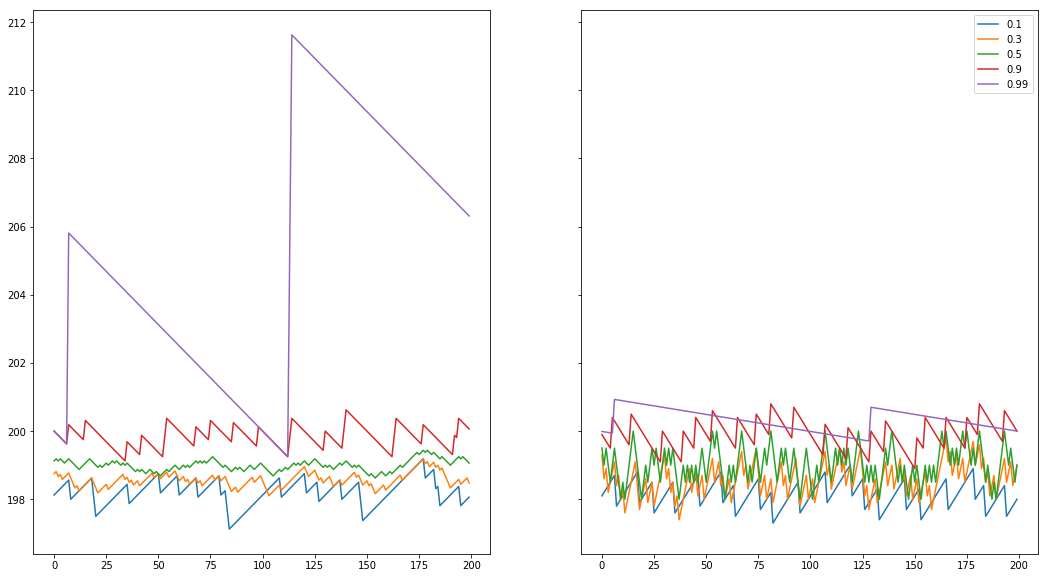

In [74]:
fig, axes = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(18, 10)

axes[0].plot(proc[35000:35200])
axes[1].plot(proc_sgd[35000:35200])
axes[1].legend(tau_vals)
plt.show()

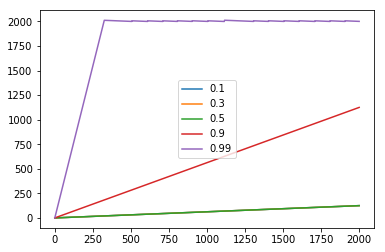

In [70]:
plt.plot(proc[:2000])
plt.legend(tau_vals)
plt.show()

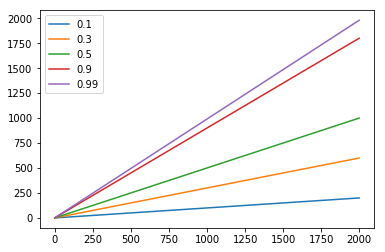

In [71]:
plt.plot(proc_sgd[:2000])
plt.legend(tau_vals)
plt.show()